# Jupyterlab testing

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import analysis_utils

sns.set()

In [4]:
# Load data.
data = analysis_utils.load_data()

# Task mapping    
task_mapping = {
    34: [70, 71],
    35: [72, 73, 74],
    36: [75, 76, 77],
    37: [78, 79]
}

data.head(n=10)

,Code Name,Subtask #,Correct path,Time User Starts ST,First Action: initial steps user takes (C if correct path),First Success (Y or N),Second Success (Y or N),Eventual Success (# or N),"Notes: where they got confused, interesting things users said",Time on task,Start time
0,CrimpleBackAntiqueCake,1,Create a new Python 3 Notebook,2:12,C,Y,NaN,NaN,User did this action after making a folder.,0.0,132.0
1,CrimpleBackAntiqueCake,2,Rename the Untitled Notebook,3:00,Double clicked on filename in tab,N,Y,NaN,NaN,34.0,180.0
2,CrimpleBackAntiqueCake,3,Create a new Folder,2:37,Right click on file browser,N,Y,NaN,User did this action before making a notebook ...,3.0,157.0
3,CrimpleBackAntiqueCake,4,Rename the Untitled Folder,2:40,C,Y,NaN,NaN,Right click to open up context menu for folder.,18.0,160.0
4,CrimpleBackAntiqueCake,5,Move notebook into the folder,NaN,User moved into the folder first.,NaN,NaN,NaN,NaN,NaN,NaN
5,CrimpleBackAntiqueCake,6,Save the notebook,3:34,C,Y,NaN,NaN,Keyboard shortcut to save the file.,39.0,214.0
6,CrimpleBackAntiqueCake,7,Close MyDataNotebook.ipynb,4:17,C,Y,NaN,NaN,Was unsure whether or not the notebook meant c...,3.0,257.0
7,CrimpleBackAntiqueCake,8,Navigate back to home folder,4:20,C,Y,NaN,NaN,NaN,12.0,260.0
8,CrimpleBackAntiqueCake,9,Delete CollectionMethods.ipynb,4:32,C,Y,NaN,NaN,NaN,3.0,272.0
9,CrimpleBackAntiqueCake,10,Create a new Python 2 notebook,4:50,C,Y,NaN,NaN,NaN,12.0,290.0


In [5]:
# Subset dataframes
task = 34

def success_plot(task, ax):
    
    filters = (
        (data["Subtask #"].isin(task_mapping[task]))
    )
    df = data[filters]
    
    x = [
        len(df[df["Eventual Success (# or N)"].isin(range(1,10))]),
        len(df[df["Second Success (Y or N) "] == "Y"]),
        len(df[df["First Success (Y or N) "] == "Y"]),
    ]
    x = np.array(x)
    x = x / x.sum()
    
    y = np.array([0, 1, 2])
    ax.barh(y, x, height=0.5, align='center')

    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels(["Eventual success", "Second success", "First success"])

    ax.set_title(f"Task #{task}")
    ax.set_xlim([0, 1])

Text(0.5,0,'Fraction of Tests')

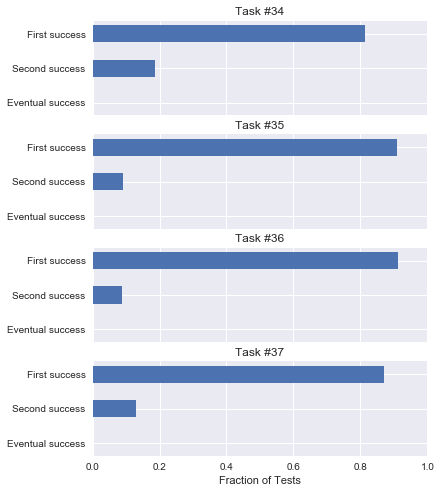

In [6]:
fig, axes = plt.subplots(nrows=4, figsize=(6, 8), sharex=True)

success_plot(34, axes[0])
success_plot(35, axes[1])
success_plot(36, axes[2])
success_plot(37, axes[3])
axes[3].set_xlabel("Fraction of Tests")

In [7]:
def tot_plot(task, ax):
    filters = (
        (data["Subtask #"].isin(task_mapping[task])) &
        (data["Time on task"] < 100)
    )
    df = data[filters]
    
    sns.distplot(df["Time on task"], ax=ax, rug=True, hist=False, kde_kws={"shade": True})
    
    ax.set_yticklabels([])
    ax.set_title("Kernel density estimation")
    ax.set_xlim(0, 100)
    ax.set_xlabel("")
    ax.set_title(f"Task #{task}")

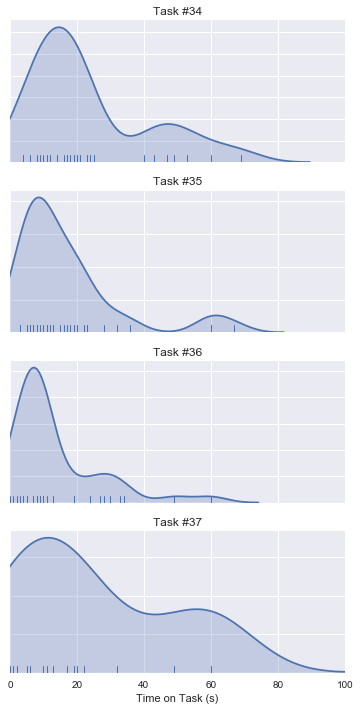

In [8]:
fig, axes = plt.subplots(nrows=4, figsize=(6, 12), sharex=True)

tot_plot(34, axes[0])
tot_plot(35, axes[1])
tot_plot(36, axes[2])
tot_plot(37, axes[3])
axes[3].set_xlabel("Time on Task (s)")